# MPHY0041 - CW1 - Notebook 2023/24

In [18]:
#import several libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

## Exercise 1: Decision Boundaries

### Load csv

In [19]:
df = pd.read_csv('PPMI_DATSCAN.csv')
print(df)

      Unnamed: 0    COHORT_DEFINITION  ENROLL_AGE  DATSCAN_CAUDATE_R  \
0              0      Healthy Control        69.1               2.99   
1              1  Parkinson's Disease        65.1               1.56   
2              2  Parkinson's Disease        67.6               2.13   
3              3  Parkinson's Disease        56.7               2.19   
4              4  Parkinson's Disease        57.5               2.28   
...          ...                  ...         ...                ...   
1068        1090      Healthy Control        70.4               3.22   
1069        1091  Parkinson's Disease        77.9               1.08   
1070        1092      Healthy Control        79.7               2.61   
1071        1093  Parkinson's Disease        59.2               0.84   
1072        1094  Parkinson's Disease        74.6               1.88   

      DATSCAN_CAUDATE_L  DATSCAN_PUTAMEN_R  DATSCAN_PUTAMEN_L  NP2PTOT  
0                  3.43               2.94               2.63 

## 1a) Cohort definition

In [20]:
# remove SWEDD subjects from the dataset
df_noSWEDD = df.drop(df[df.COHORT_DEFINITION == 'SWEDD'].index)
df_noSWEDD.to_csv('NoSWEDD.csv', index=False)
print(df_noSWEDD)

      Unnamed: 0    COHORT_DEFINITION  ENROLL_AGE  DATSCAN_CAUDATE_R  \
0              0      Healthy Control        69.1               2.99   
1              1  Parkinson's Disease        65.1               1.56   
2              2  Parkinson's Disease        67.6               2.13   
3              3  Parkinson's Disease        56.7               2.19   
4              4  Parkinson's Disease        57.5               2.28   
...          ...                  ...         ...                ...   
1068        1090      Healthy Control        70.4               3.22   
1069        1091  Parkinson's Disease        77.9               1.08   
1070        1092      Healthy Control        79.7               2.61   
1071        1093  Parkinson's Disease        59.2               0.84   
1072        1094  Parkinson's Disease        74.6               1.88   

      DATSCAN_CAUDATE_L  DATSCAN_PUTAMEN_R  DATSCAN_PUTAMEN_L  NP2PTOT  
0                  3.43               2.94               2.63 

Sense check: Original file 1073 rows, subset minus SWEDD 995 rows. Confirmed this is as expected from original dataset.

In [21]:
# Compute means for DaT scan in the right putamen
mean_cohort = df_noSWEDD.groupby('COHORT_DEFINITION')['DATSCAN_PUTAMEN_R'].mean()
print('mean of Putamen_R, grouped by ' + str(mean_cohort))

mean of Putamen_R, grouped by COHORT_DEFINITION
Healthy Control        2.156634
Parkinson's Disease    0.833064
Name: DATSCAN_PUTAMEN_R, dtype: float64


Sense check: confirmed with Excel

In [22]:
# Compute the standard deviation
std_cohort = df_noSWEDD['DATSCAN_PUTAMEN_R'].std()
print(std_cohort)

0.690582735027221


In [23]:
# Compute the decision boundary 

For a 1D problem,the two Gaussian distributions intersect at one point on the x-axis. Assuming that they have equal distribution, we can calculate the mean (M1 + M2/2)

In [24]:
mean_cohort.tolist()
Intercept = (mean_cohort[0]+mean_cohort[1])/2
print(Intercept)

1.4948489880513902


/var/folders/bg/bmn7by4x15sgj4tt20j628pm0000gn/T/ipykernel_83939/2254511721.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Intercept = (mean_cohort[0]+mean_cohort[1])/2


## Problem 1b

In [10]:
#library imports for 1b
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.inspection import DecisionBoundaryDisplay as DBD

In [11]:
#sklearn
x = df_noSWEDD[['DATSCAN_PUTAMEN_R','NP2PTOT']]

#if scaled - not use in original plot
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns = x.columns

y = df_noSWEDD['COHORT_DEFINITION'].apply(lambda x: 1 if x =="Parkinson's Disease" else 0)
# linear_model (covered in Week_2)
model = LinearRegression()
model.fit(x_scaled, y)


# Coefficients for Decision Boundary
Lin_coef = model.coef_
Lin_intercept = model.intercept_

print('Lin_coef', Lin_coef, 'Lin_intercept', Lin_intercept, x_scaled)

# setting up the maths for the decsion boundary - zero indexing [1] is second coefficient
# for plotting in the form y = mx + c

def decision_boundary(x_scaled):
    return 0.5/Lin_coef[1]+(-Lin_coef[0]*x_scaled-Lin_intercept)/Lin_coef[1]

# solutions to the decision boundary equation 
x_axis_values = np.linspace(-2, 4,50)
print(x_axis_values)
y_axis_values = decision_boundary(x_axis_values)
                                 

Lin_coef [-0.27785185  0.0698653 ] Lin_intercept 0.7969849246231155      DATSCAN_PUTAMEN_R   NP2PTOT
0             2.663194 -1.066333
1            -0.697977 -0.458193
2            -0.437197  1.974365
3            -0.640026 -0.052767
4            -0.495148 -0.255480
..                 ...       ...
990           1.895340 -1.066333
991          -0.973246 -0.660906
992           0.721828 -0.863619
993          -0.813880  0.758086
994           0.084364 -0.458193

[995 rows x 2 columns]
[-2.         -1.87755102 -1.75510204 -1.63265306 -1.51020408 -1.3877551
 -1.26530612 -1.14285714 -1.02040816 -0.89795918 -0.7755102  -0.65306122
 -0.53061224 -0.40816327 -0.28571429 -0.16326531 -0.04081633  0.08163265
  0.20408163  0.32653061  0.44897959  0.57142857  0.69387755  0.81632653
  0.93877551  1.06122449  1.18367347  1.30612245  1.42857143  1.55102041
  1.67346939  1.79591837  1.91836735  2.04081633  2.16326531  2.28571429
  2.40816327  2.53061224  2.65306122  2.7755102   2.89795918  3.02040816
  

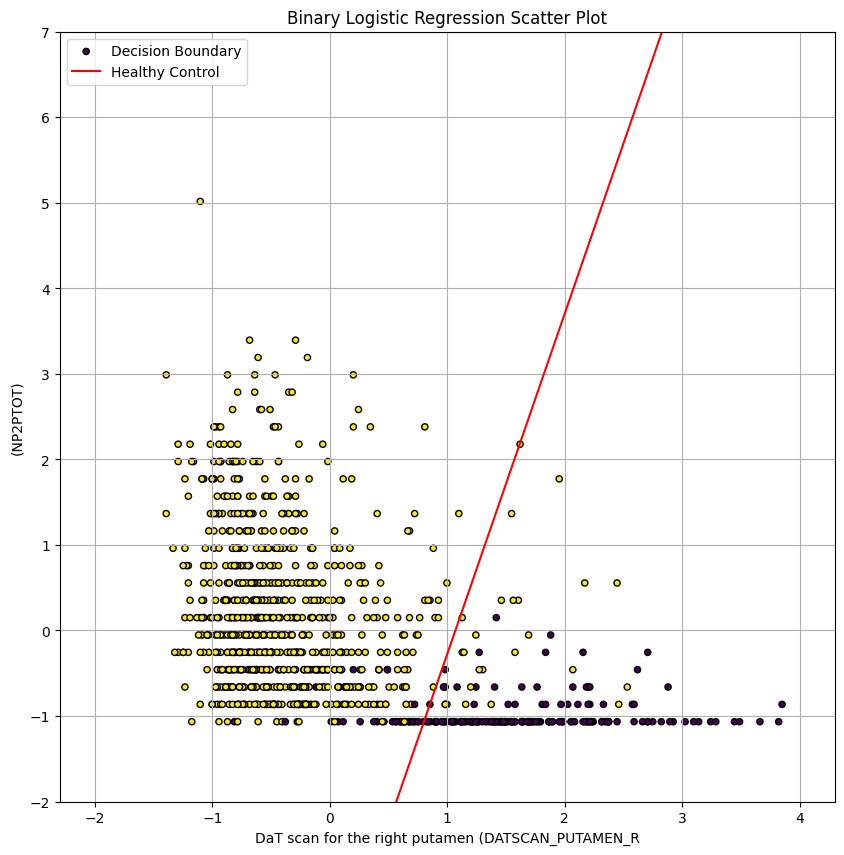

In [12]:
# create a scatterplot
plt.figure(figsize=(10,10))
# plot data
plt.scatter(x_scaled['DATSCAN_PUTAMEN_R'], x_scaled['NP2PTOT'], c=y, edgecolor='k', s=20, label='Data')
# plot decision boundary
plt.plot(x_axis_values, y_axis_values, label='decision boundary', c='r')
# plot tidying
plt.title('Binary Logistic Regression Scatter Plot')
plt.xlabel('DaT scan for the right putamen (DATSCAN_PUTAMEN_R')
plt.ylabel('(NP2PTOT)')
plt.ylim(-2,7)
plt.legend([ 'Decision Boundary','Healthy Control', "Parkinson's Disease"])
plt.grid(True)


plt.show()

Sense check: the y intercept should be linear intercept 


## Problem 1c



In [13]:
df = pd.read_csv('PPMI_DATSCAN.csv')
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'materials/PPMI_DATSCAN.csv'

In [ ]:
# full dataset is df

# Putamen_R
mean_cohort_df = df.groupby('COHORT_DEFINITION')['DATSCAN_PUTAMEN_R'].mean()
print('mean of Putamen_R, grouped by ' + str(mean_cohort_df))

# NP2PTOT
mean_cohort_df = df.groupby('COHORT_DEFINITION')['NP2PTOT'].mean()
print('mean of NP2PTOT, grouped by ' + str(mean_cohort_df))


mean of Putamen_R, grouped by COHORT_DEFINITION
Healthy Control        2.156634
Parkinson's Disease    0.833064
SWEDD                  2.058846
Name: DATSCAN_PUTAMEN_R, dtype: float64
mean of NP2PTOT, grouped by COHORT_DEFINITION
Healthy Control        0.430693
Parkinson's Disease    6.490542
SWEDD                  5.641026
Name: NP2PTOT, dtype: float64


### Covariance Matrix

In [ ]:
# Covariance matrix - ue .cov

df_subset = df.filter(items=['DATSCAN_PUTAMEN_R','NP2PTOT'])
print(df_subset)
cov_matrix = df_subset.cov()
print(cov_matrix)


      DATSCAN_PUTAMEN_R  NP2PTOT
0                  2.94      0.0
1                  0.62      3.0
2                  0.80     15.0
3                  0.66      5.0
4                  0.76      4.0
...                 ...      ...
1068               2.41      0.0
1069               0.43      2.0
1070               1.60      1.0
1071               0.54      9.0
1072               1.16      3.0

[1073 rows x 2 columns]
                   DATSCAN_PUTAMEN_R    NP2PTOT
DATSCAN_PUTAMEN_R           0.522936  -1.421861
NP2PTOT                    -1.421861  24.477626


### Multiclass setting using Logistic regression

In [ ]:
# new imports for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# compute linear descision boundaries

#sklearn
x_df = df[['DATSCAN_PUTAMEN_R','NP2PTOT']]

#if scaled - not use in original plot
scaler.fit(x_df)
x_df_scaled = scaler.transform(x_df)
x_df_scaled = pd.DataFrame(x_df_scaled)
x_df_scaled.columns = x.columns

# 0-HC,1-PD,2-SWEDD
y = df['COHORT_DEFINITION'].apply(lambda x: 1 if x =="Parkinson's Disease" else (2 if x == "SWEDD" else 0))

# linear_model - but make it multiclass
# Using LogisticRegression() has to be modified for multi-class problem
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_df_scaled, y)

# Coefficients for Decision Boundary
Lin_coef_multi = model.coef_
Lin_intercept_multi = model.intercept_

print('Lin_coef_multi', Lin_coef_multi, 'Lin_intercept_multi', Lin_intercept_multi, x_df_scaled)



def decision_boundary_1(x_df_scaled):
    return 0.5/Lin_coef_multi[0,1]+(-Lin_coef_multi[0,0]*x_df_scaled-Lin_intercept_multi[0])/Lin_coef_multi[0,1]

def decision_boundary_2(x_df_scaled):
    return 0.5/Lin_coef_multi[1,1]+(-Lin_coef_multi[1,0]*x_df_scaled-Lin_intercept_multi[1])/Lin_coef_multi[1,1]

def decision_boundary_3(x_df_scaled):
    return 0.5/Lin_coef_multi[2,1]+(-Lin_coef_multi[2,0]*x_df_scaled-Lin_intercept_multi[2])/Lin_coef_multi[2,1]
# solutions to the decision boundary equation 

x_axis_values = np.linspace(-2, 4,50)

y_axis_values_1 = decision_boundary_1(x_df_scaled)
y_axis_values_2 = decision_boundary_2(x_df_scaled)
y_axis_values_3 = decision_boundary_3(x_df_scaled)

yhat = model.predict(x_df_scaled)

print(x_axis_values,y_axis_values_1)

Lin_coef_multi [[ 1.02987879 -3.41699477]
 [-1.8808245   1.77806248]
 [ 0.85094571  1.63893229]] Lin_intercept_multi [-2.91216861  2.96334959 -0.05118098]       DATSCAN_PUTAMEN_R   NP2PTOT
0              2.446933 -1.069319
1             -0.762780 -0.462668
2             -0.513751  1.963937
3             -0.707440 -0.058234
4             -0.569090 -0.260451
...                 ...       ...
1068           1.713679 -1.069319
1069          -1.025644 -0.664885
1070           0.593047 -0.867102
1071          -0.873460  0.750634
1072          -0.015692 -0.462668

[1073 rows x 2 columns]
[-2.         -1.87755102 -1.75510204 -1.63265306 -1.51020408 -1.3877551
 -1.26530612 -1.14285714 -1.02040816 -0.89795918 -0.7755102  -0.65306122
 -0.53061224 -0.40816327 -0.28571429 -0.16326531 -0.04081633  0.08163265
  0.20408163  0.32653061  0.44897959  0.57142857  0.69387755  0.81632653
  0.93877551  1.06122449  1.18367347  1.30612245  1.42857143  1.55102041
  1.67346939  1.79591837  1.91836735  2.04081633

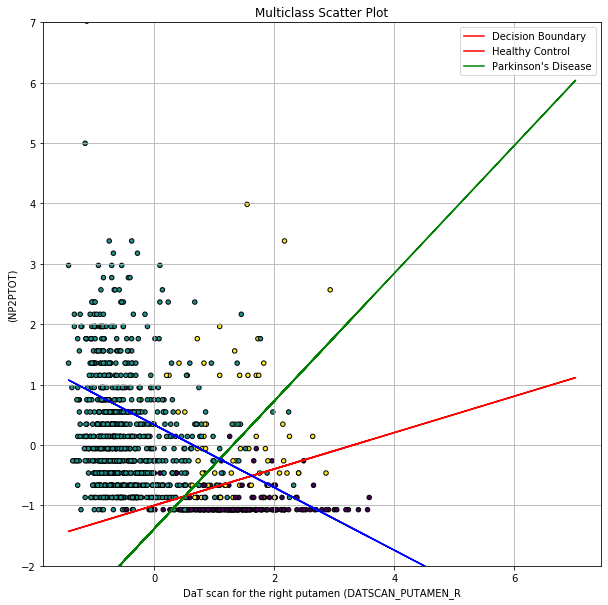

In [ ]:
# create a scatterplot for the 3 classes
plt.figure(figsize=(10,10))
# plot data
plt.scatter(x_df_scaled['DATSCAN_PUTAMEN_R'], x_df_scaled['NP2PTOT'], c=y, edgecolor='k', s=20, label='Data')
# plot decision boundary
plt.plot(x_df_scaled, y_axis_values_1, label='decision boundary', c='r')
plt.plot(x_df_scaled, y_axis_values_2, label='decision boundary', c='g')
plt.plot(x_df_scaled, y_axis_values_3, label='decision boundary', c='b')
# plot tidying
plt.title('Multiclass Scatter Plot')
plt.xlabel('DaT scan for the right putamen (DATSCAN_PUTAMEN_R')
plt.ylabel('(NP2PTOT)')
plt.ylim(-2,7)
plt.legend([ 'Decision Boundary','Healthy Control', "Parkinson's Disease"])
plt.grid(True)


plt.show()

In [ ]:
# compute linear descision boundaries

#sklearn
x_df = df[['DATSCAN_PUTAMEN_R','NP2PTOT']]
# 0-HC,1-PD,2-SWEDD
y = df['COHORT_DEFINITION'].apply(lambda x: 1 if x =="Parkinson's Disease" else (2 if x == "SWEDD" else 0))

# linear_model - but make it multiclass
# Using LogisticRegression() has to be modified for multi-class problem
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_df, y)

# Coefficients for Decision Boundary
Lin_coef_multi = model.coef_
Lin_intercept_multi = model.intercept_

print('Lin_coef_multi', Lin_coef_multi, 'Lin_intercept_multi', Lin_intercept_multi, x_df)



def decision_boundary_1(x_df):
    return 0.5/Lin_coef_multi[0,1]+(-Lin_coef_multi[0,0]*x_df-Lin_intercept_multi[0])/Lin_coef_multi[0,1]

def decision_boundary_2(x_df):
    return 0.5/Lin_coef_multi[1,1]+(-Lin_coef_multi[1,0]*x_df-Lin_intercept_multi[1])/Lin_coef_multi[1,1]

def decision_boundary_3(x_df):
    return 0.5/Lin_coef_multi[2,1]+(-Lin_coef_multi[2,0]*x_df-Lin_intercept_multi[2])/Lin_coef_multi[2,1]
# solutions to the decision boundary equation 

x_axis_values = np.linspace(-2, 4,50)

y_axis_values_1 = decision_boundary_1(x_df)
y_axis_values_2 = decision_boundary_2(x_df)
y_axis_values_3 = decision_boundary_3(x_df)

yhat = model.predict(x_df)

print(x_axis_values,y_axis_values_1)

Lin_coef_multi [[ 1.43099954 -0.85906041]
 [-2.54814636  0.44226769]
 [ 1.11714681  0.41679272]] Lin_intercept_multi [-0.74822531  3.94128157 -3.19305626]       DATSCAN_PUTAMEN_R  NP2PTOT
0                  2.94      0.0
1                  0.62      3.0
2                  0.80     15.0
3                  0.66      5.0
4                  0.76      4.0
...                 ...      ...
1068               2.41      0.0
1069               0.43      2.0
1070               1.60      1.0
1071               0.54      9.0
1072               1.16      3.0

[1073 rows x 2 columns]
[-2.         -1.87755102 -1.75510204 -1.63265306 -1.51020408 -1.3877551
 -1.26530612 -1.14285714 -1.02040816 -0.89795918 -0.7755102  -0.65306122
 -0.53061224 -0.40816327 -0.28571429 -0.16326531 -0.04081633  0.08163265
  0.20408163  0.32653061  0.44897959  0.57142857  0.69387755  0.81632653
  0.93877551  1.06122449  1.18367347  1.30612245  1.42857143  1.55102041
  1.67346939  1.79591837  1.91836735  2.04081633  2.16326531

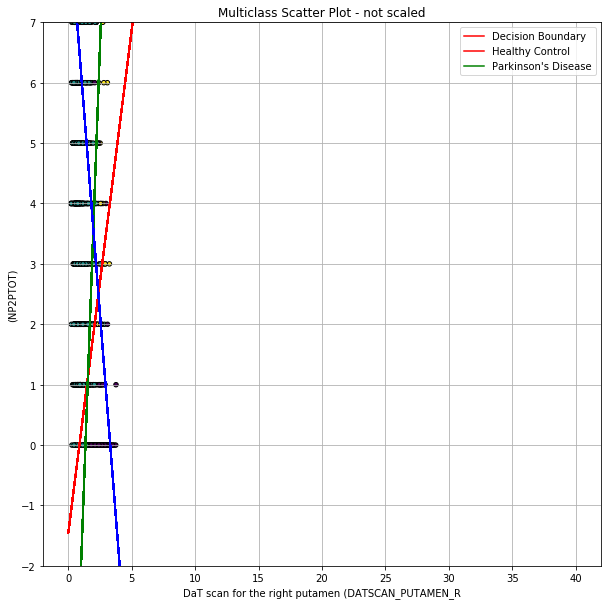

In [ ]:
# create a scatterplot for the 3 classes
plt.figure(figsize=(10,10))
# plot data
plt.scatter(x_df['DATSCAN_PUTAMEN_R'], x_df['NP2PTOT'], c=y, edgecolor='k', s=20, label='Data')
# plot decision boundary
plt.plot(x_df, y_axis_values_1, label='decision boundary', c='r')
plt.plot(x_df, y_axis_values_2, label='decision boundary', c='g')
plt.plot(x_df, y_axis_values_3, label='decision boundary', c='b')
# plot tidying
plt.title('Multiclass Scatter Plot - not scaled')
plt.xlabel('DaT scan for the right putamen (DATSCAN_PUTAMEN_R')
plt.ylabel('(NP2PTOT)')
plt.ylim(-2,7)
plt.legend([ 'Decision Boundary','Healthy Control', "Parkinson's Disease"])
plt.grid(True)


plt.show()

In [ ]:
### Using Linear Discriminant Analysis

In [ ]:
x_df = df[['DATSCAN_PUTAMEN_R','NP2PTOT']]

#if scaled - not use in original plot
scaler.fit(x_df)
x_df_scaled = scaler.transform(x_df)
x_df_scaled = pd.DataFrame(x_df_scaled)
x_df_scaled.columns = x.columns

# 0-HC,1-PD,2-SWEDD
y = df['COHORT_DEFINITION'].apply(lambda x: 1 if x =="Parkinson's Disease" else (2 if x == "SWEDD" else 0))

# Linear Discriminant Analysis - linear for multi class
model_2 = LinearDiscriminantAnalysis()
model_2.fit(x_df_scaled, y)
# Coefficients for Decision Boundary
Lin_coef_multi = model.coef_
Lin_intercept_multi = model.intercept_

print('Lin_coef_multi', Lin_coef_multi, 'Lin_intercept_multi', Lin_intercept_multi)


def decision_boundary_1(x_df_scaled):
    return 0.33/Lin_coef_multi[1]+(-Lin_coef_multi[0]*x_df_scaled-Lin_intercept_multi[0])/Lin_coef_multi[1]

def decision_boundary_2(x_df_scaled):
    return 0.33/Lin_coef_multi[2]+(-Lin_coef_multi[1]*x_df_scaled-Lin_intercept_multi[1])/Lin_coef_multi[2]

def decision_boundary_3(x_df_scaled):
    return 0.33/Lin_coef_multi[0]+(-Lin_coef_multi[2]*x_df_scaled-Lin_intercept_multi[2])/Lin_coef_multi[0]
# solutions to the decision boundary equation 
x_axis_values = np.linspace(-2, 4,50)

y_axis_values_1 = decision_boundary_1(x_df_scaled)
y_axis_values_2 = decision_boundary_2(x_df_scaled)
y_axis_values_3 = decision_boundary_3(x_df_scaled)

yhat = model.predict(x_df_scaled)

print(x_axis_values,y_axis_values_1)

Lin_coef_multi [[ 1.43099954 -0.85906041]
 [-2.54814636  0.44226769]
 [ 1.11714681  0.41679272]] Lin_intercept_multi [-0.74822531  3.94128157 -3.19305626]
[-2.         -1.87755102 -1.75510204 -1.63265306 -1.51020408 -1.3877551
 -1.26530612 -1.14285714 -1.02040816 -0.89795918 -0.7755102  -0.65306122
 -0.53061224 -0.40816327 -0.28571429 -0.16326531 -0.04081633  0.08163265
  0.20408163  0.32653061  0.44897959  0.57142857  0.69387755  0.81632653
  0.93877551  1.06122449  1.18367347  1.30612245  1.42857143  1.55102041
  1.67346939  1.79591837  1.91836735  2.04081633  2.16326531  2.28571429
  2.40816327  2.53061224  2.65306122  2.7755102   2.89795918  3.02040816
  3.14285714  3.26530612  3.3877551   3.51020408  3.63265306  3.75510204
  3.87755102  4.        ]       DATSCAN_PUTAMEN_R   NP2PTOT
0              0.951018  0.360902
1             -0.851506  1.539261
2             -0.711655  6.252696
3             -0.820428  2.324834
4             -0.742733  1.932047
...                 ...       ..

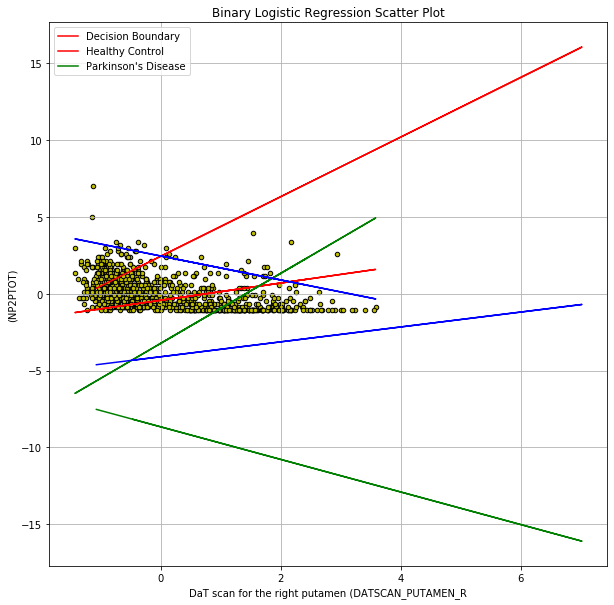

In [ ]:
# create a scatterplot for the 3 classes
plt.figure(figsize=(10,10))
# plot data
plt.scatter(x_df_scaled['DATSCAN_PUTAMEN_R'], x_df_scaled['NP2PTOT'], c='y', edgecolor='k', s=20, label='Data')
# plot decision boundary
plt.plot(x_df_scaled, y_axis_values_1, label='decision boundary', c='r')
plt.plot(x_df_scaled, y_axis_values_2, label='decision boundary', c='g')
plt.plot(x_df_scaled, y_axis_values_3, label='decision boundary', c='b')
# plot tidying
plt.title('Binary Logistic Regression Scatter Plot')
plt.xlabel('DaT scan for the right putamen (DATSCAN_PUTAMEN_R')
plt.ylabel('(NP2PTOT)')
plt.legend([ 'Decision Boundary','Healthy Control', "Parkinson's Disease"])
plt.grid(True)


plt.show()

## Exercise 2: Regression Implementations

### a) Complete the code for Linear Regression RSS with L2 regularization

In [14]:
# libraries for exercise 2
from sklearn.metrics import mean_squared_error

In [32]:
#implement ridge regression (linear regression with L2 regularization)
#this function fits Linear Regression with L2 regularization (ridge regression) using Gradient Descent
#inputs are
#y:         continous values
#features:  input feature matrix
#lam:       lambda value for regularization
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#function returns the intercept_ (\beta_0) and the coefficients_ (\beta_i)
def fit_RSSl2_GRAD(y, features, lam=0.00, eps=1e-9, rho=1.0, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    yhat =  X @ betas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost = np.sum((yhat - y) ** 2) / (2 * N) + lam * np.sum(betas_ ** 2)

    #as long as the there is a difference between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ = betas_ - rho * (X.T @ (yhat - y) / N + 2 * lam * betas_)

        #update predictions
        yhat =  X @ betas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost = np.sum((yhat - y) ** 2) / (2 * N) + lam * np.sum(betas_ ** 2)
        print(cost)
        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            print(rho)
            rho /= 2
    return(betas_)

In [33]:
sim_pd = pd.read_csv('sim_dat.csv')


In [34]:
y = sim_pd['y']
features = sim_pd.drop(['y'],axis=1)
model1 = fit_RSSl2_GRAD(y, features, lam=0.00,eps=1e-9,rho=1.0,maxiter=10000)
model2 = fit_RSSl2_GRAD(y, features, lam=0.4,eps=1e-9,rho=1.0,maxiter=10000)
model3 = fit_RSSl2_GRAD(y, features, lam=0.1,eps=1e-9,rho=1.0,maxiter=10000)

print(model1, model2, model3)

4.114785279518176
8.463038604279966
1.0
1.6229525494078365
0.9928057418448196
0.9161429632536539
0.8902230340121156
0.8702443480692811
0.8521134808522176
0.8353646333186329
0.819862588258273
0.8055088664497276
0.7922150044097775
0.779899645520485
0.768487793296239
0.757910295709773
0.7481033854402341
0.7390082576333556
0.7305706809694982
0.7227406393068938
0.7154720014847475
0.7087222170701472
0.7024520360079446
0.6966252502934625
0.6912084559358286
0.6861708336160681
0.6814839465696443
0.6771215543388568
0.6730594411470829
0.6692752577450514
0.6657483756698214
0.6624597529404768
0.6593918102913507
0.656528317114336
0.6538542863470234
0.6513558776034516
0.6490203078995919
0.6468357693766444
0.6447913534721956
0.6428769810325419
0.641083337899347
0.6394018155405247
0.6378244563290637
0.6363439031046904
0.6349533526819766
0.6336465129949554
0.6324175635926909
0.6312611192226963
0.6301721962597919
0.6291461817570491
0.6281788049130401
0.6272661107657777
0.6264044359386558
0.62559038627741

In [ ]:
# set up x and y values
test_df = pd.read_csv('sim_test.csv')
# the actual y values 
y_test = test_df['y'] 

# the actual x values used in predictions
features_test = test_df.drop(['y'],axis=1) 
X1_test = features_test['x1']

X_test_with_intercept = np.c_[np.ones(features_test.shape[0]), features_test]

# model answers
y_model1 = X_test_with_intercept @ model1
y_model2 = X_test_with_intercept @ model2
y_model3 = X_test_with_intercept @ model3

# errors for each model
mse_1 = mean_squared_error(y_test, y_model1)
print("Mean Squared Error for model 1 on Test Set:", mse_1)
mse_2 = mean_squared_error(y_test, y_model2)
print("Mean Squared Error for model 2 on Test Set:", mse_2)
mse_3 = mean_squared_error(y_test, y_model3)
print("Mean Squared Error for model 3 on Test Set:", mse_3)


Mean Squared Error for model 1 on Test Set: 0.9177281758601387
Mean Squared Error for model 2 on Test Set: 2.508478536068548
Mean Squared Error for model 3 on Test Set: 1.4716692389431665


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


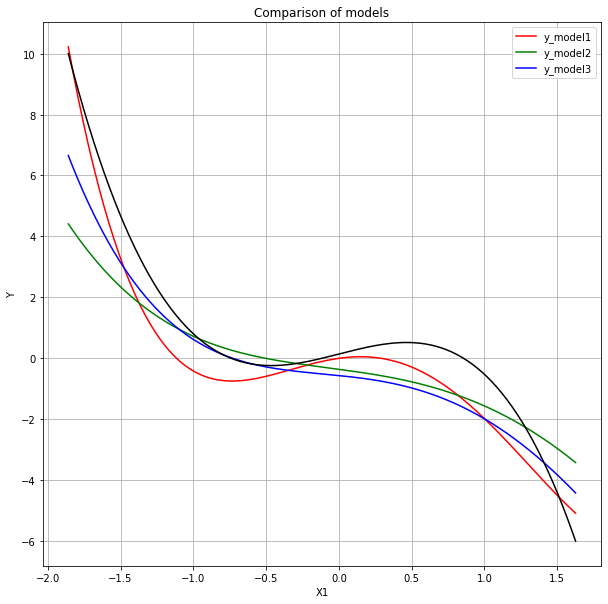

In [ ]:
# create a scatterplot for the 3 classes
plt.figure(figsize=(10,10))
# plot data
#plt.scatter(x_df_scaled['DATSCAN_PUTAMEN_R'], x_df_scaled['NP2PTOT'], c='y', edgecolor='k', s=20, label='Data')
# plot decision boundary
plt.plot(X1_test, y_model1, label='y_model1', c='r')
plt.plot(X1_test, y_model2, label='y_model2', c='g')
plt.plot(X1_test, y_model3, label='y_model3', c='b')
plt.plot(X1_test, y_test, label='y_test', c='k')
# plot tidying
plt.title('Comparison of models')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend([ 'y_model1','y_model2', "y_model3"])
plt.grid(True)


plt.show()

### b) Complete the code for Linear Regression with LogCosh loss via Gradient Descent

In [35]:
#this function fits Linear Regression with LogCosh loss using Gradient Descent
#inputs are
#y:         continous values
#features:  input feature matrix
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#this function returns the beta coefficients for a Linear Regression model
#the first entry (betas[0] is the intercept)
def fit_logcosh_GRAD(y, features, eps=1e-9, rho=1.0, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    yhat =  X @ betas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost = np.sum(np.log(np.cosh(yhat - y))) / N
    #as long as the there is a difference between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ = betas_ - rho * (X.T @ (np.sinh(yhat - y) / np.cosh(yhat - y)) / N)

        #update predictions
        yhat =  X @ betas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost = np.sum(np.log(np.cosh(yhat - y))) / N

        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            rho /= 2
    return(betas_)

(25,) (25, 4)
[-0.89233191  0.77939648 -1.10408784 -3.36985832  1.74262308]
Mean Squared Error for model 1 on Test Set: 1.1996288714191976


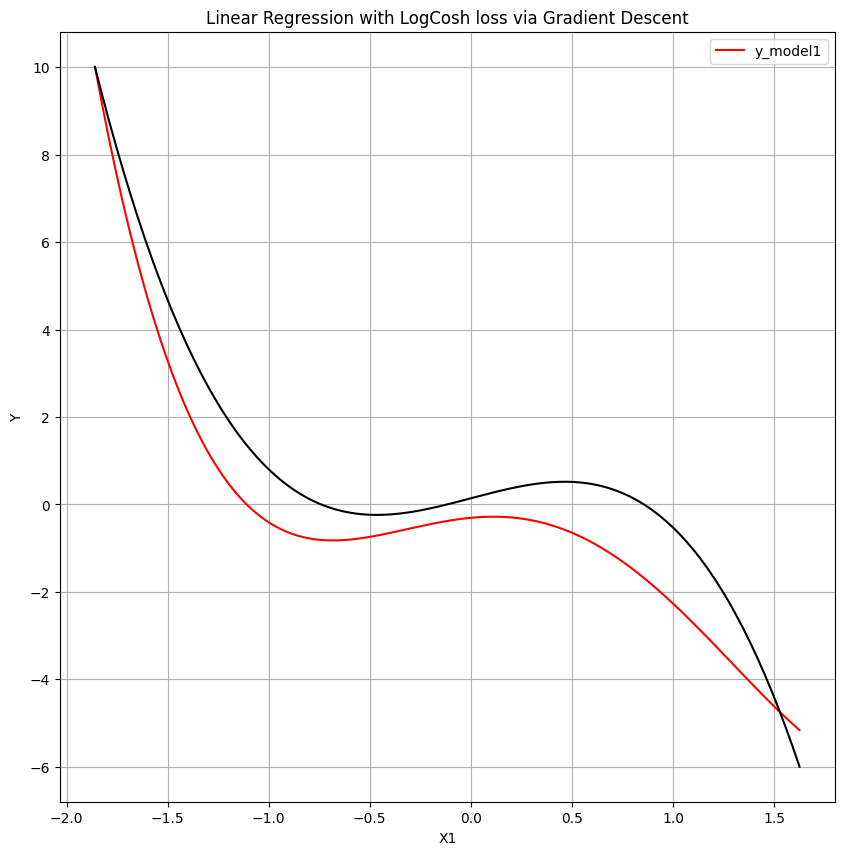

In [36]:
sim_pd = pd.read_csv('sim_dat.csv')

y = sim_pd['y']
features = sim_pd.drop(['y'],axis=1)
print(y.shape, features.shape)


model1_log = fit_logcosh_GRAD(y, features, eps=1e-9, rho=1.0, maxiter=10000)

print(model1_log)


# set up x and y values
test_df = pd.read_csv('sim_test.csv')
# the actual y values 
y_test = test_df['y'] 

# the actual x values used in predictions
features_test = test_df.drop(['y'],axis=1) 
X1_test = features_test['x1']
X_test_with_intercept = np.c_[np.ones(features_test.shape[0]), features_test]

# model answers
y_model1_log = X_test_with_intercept @ model1_log

# errors for each model
mse_1 = mean_squared_error(y_test, y_model1_log)
print("Mean Squared Error for model 1 on Test Set:", mse_1)


# create a scatterplot
plt.figure(figsize=(10,10))
# plot data
#plt.scatter(x_df_scaled['DATSCAN_PUTAMEN_R'], x_df_scaled['NP2PTOT'], c='y', edgecolor='k', s=20, label='Data')
# plot decision boundary
plt.plot(X1_test, y_model1_log, label='y_model1', c='r')
plt.plot(X1_test, y_test, label='y_test', c='k')
# plot tidying
plt.title('Linear Regression with LogCosh loss via Gradient Descent')
plt.xlabel('X1')
plt.ylabel('Y')
plt.legend([ 'y_model1'])
plt.grid(True)


plt.show()

### c) Complete the code for linear regression with linear models for mean and standard deviation

* Deriving the Loss function:

* Deriving the gradients:


In [ ]:
#this function fits Linear Regression flexible noise component N(mu(x), sigma(x))
#inputs are
#y:         continous values
#features:  input feature matrix
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#this function returns the beta coefficients for a Linear Regression model
#the first entry (betas[0] is the intercept)
def fit_norm_GRAD(y, features, eps=1e-9, rho=0.1, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    thetas_ = np.ones(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    mu_hat =  X @ betas_
    sigma_hat = X @ thetas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost =
    #as long as the there is a differentce between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ =
        thetas_ =

        #update probabilities
        mu_hat =  X @ betas_
        sigma_hat = X @ thetas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost =

        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            rho /= 2
    return(betas_, thetas_)

## Exercise 3: Suggest improvements to the ML pipeline



1.   
2.  
3.
4.



## Exercise 4: Retinal Fluid Segmentation

In [ ]:
import imageio.v3
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import svm
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import image
from skimage.filters import scharr
from skimage.color import rgb2gray


In [ ]:
#helper function to read image along with mask
def read_img(pt, iname):
  img_f = os.listdir(pt + "/" + iname + "/images/")[0]
  msk_f = os.listdir(pt + "/" + iname + "/masks/")[0]
  im  = imageio.v3.imread(pt + "/" + iname + "/images/" + img_f)
  msk = imageio.v3.imread(pt + "/" + iname + "/masks/" + msk_f)
  return (im, msk)

In [ ]:
train_path = './train/'
vali_path = './vali/'
test_path = './test/'

In [ ]:
#this function takes an input image and
#does the manual feature extraction
#currently it simply turns the color image to a gray scale image.
#but you can modify this function to add new features
#e.g., by appling any filters.

#if the variable nchan is sset to True, then the return is just the number of channels

def preprocess_img(img, nchan=False):
    #some examples for pre-processing:

    ##do nothing
    ##copy all three channels
    #res = img

    ##just use the green channel
    #res = img[:,:,1]

    ##single channel gray
    res = rgb2gray(img) * 255

    #note some of the images are bit 'cut off' this sets the white regions to black
    res[res > 250] = 0

    #some examples for possible extensions:
    ##add the red channel
    #res = np.dstack( (res, img[:,:,1]))

    #add some edge filter applied to the green channel
    #res = np.dstack((res, scharr(img[:,:,1]) * 255))

    #NOTE: the skimage library contains useful filters

    #if nchan is True, then just return the number of channels
    #the pre-processing produces
    if nchan:
        try:
            return(res.shape[2])
        except IndexError:
            return(1)
    return (res)

In [ ]:
#turn the images into a training dataset
#train_path:    path to the training data
#n_train_patch: number of patches to be extracted per image
#ps :           patch size as integer (e.g., 7 -> 7x7 patches)
#chan:          number of 'channels' the pre_processed image will have

def create_training_set(train_path, n_train_patch, ps, chan, verbose=True):
  if verbose:
    print("Extracting " + str(n_train_patch) + " pataches of size " + str(ps) + "x" + str(ps) + " from each image.")

  #dimension of square patch
  patch_dim = (ps, ps)
  #center of the patch
  patch_cnt = int((ps-1)/2)
  #dimension of the 'flattened' patch

  flat_dim = ps*ps*chan

  #initialize Y and X
  Y = []
  X = np.empty((0,flat_dim))

  train_imgs = os.listdir(train_path)

  for s in np.arange(400):
    if verbose:
      print("Extracting data from subject: " + str(s))

    img_m, msk_x = read_img(train_path, train_imgs[s])

    #binarize the mask
    msk = (msk_x > 0) * 1

    #extract features
    frames = preprocess_img(img_m)
    #add the labels as an additional channel
    frames = np.dstack((frames, msk))

    #sample patches
    patch = image.extract_patches_2d(frames, patch_dim, max_patches=n_train_patch)

    #each patch receives the label of the center value in the 'label' channel
    Y_tmp = patch[:,patch_cnt,patch_cnt,chan] == 1
    #turn patches into a matrix where each row corresponds to all the features
    #of one patch
    X_tmp = np.reshape(patch[:,:,:,0:chan],(n_train_patch,flat_dim))

    #concatenate with Y and X
    Y.extend(Y_tmp)
    X = np.concatenate((X, X_tmp), axis=0)
  return (Y, X)

In [ ]:
#this function takes X and Y as input and
#oversamples the target class ('1') with a ratio:1 ratio (default: 200)
#from the overall size of X a sub_sample of 'sample_size' is randomly selected
def sub_sample(X, Y, sample_size=10000, ratio=200):
  #resampling with 200:1 chance
  weights = np.array([1] * len(Y))
  weights[Y] = 200
  weights = weights/np.sum(weights)

  #sample 10000 of the generated patches
  idx = np.random.choice(X.shape[0],sample_size,replace=False, p=np.array(weights))

  Xsub = X[idx,:]
  Ysub = np.array(Y)[idx]

  return Xsub, Ysub, idx

In [ ]:
im, msk = read_img(train_path, "10DME_F")
#show the input image
plt.imshow(im)
#obtain the number of channels
chan = preprocess_img(im, True)

### code for parts a) - f)